In [164]:
import pandas as pd
import numpy as np, random, scipy.stats as ss
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages

In [137]:
#Import wine dataset. Shows characteristics of wine, and whether it is high quality low quality.
data=pd.read_csv("Wine_Data.csv")
data.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [138]:
#Create new column, red=1, otherwise 0 using np.where. Remove existing 'color' column
data["is_red"] = np.where(data["color"]=='red',1,0)
numeric_data = data.drop(["color"], axis=1)
numeric_data.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality,is_red
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1


In [139]:
#There are 6497 wines in the dataset, of which 1599 are red.
print(numeric_data["is_red"].sum())
print(numeric_data.shape)

1599
(6497, 15)


In [163]:
#4113 out of 6497 wines are high quality, which means we have an inbalance in data towards high quality.
print(numeric_data["high_quality"].sum())

4113


In [140]:
#Create a numpy array for independent variables
col_names = list(numeric_data.columns)
col_names.remove("quality")
col_names.remove("high_quality")
X = numeric_data.loc[:,(col_names)]
X = np.array(X)
X.shape

(6497, 13)

In [141]:
#Create a numpy array for dependent variables, high quality wine (1) vs. low quality wine (0)
y = numeric_data.loc[:, "high_quality"]
y = np.array(y).reshape(-1,1)
y.shape

(6497, 1)

In [142]:
#Split the datasets into training a sets and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

(5197, 13)
(1300, 13)


In [143]:
#Standardize the training and test independent variables.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [145]:
#13 variables is too much! Lets use princicple component analysis to reduce them to two.
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(5197, 2)
(1300, 2)


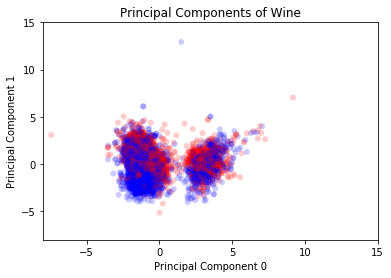

In [156]:
#A PC is a linear combination of existing variables such that variance in that direction is maximised.
observation_colormap = ListedColormap(['red', 'blue'])
plt.title("Principal Components of Wine")
plt.scatter(X_train[:,0],X_train[:,1], alpha = 0.2, c = y_train.flatten(), cmap = observation_colormap, edgecolors = 'none')
plt.xlim(-8, 15); plt.ylim(-8, 15)
plt.xlabel("Principal Component 0")
plt.ylabel("Principal Component 1")
plt.show()

In [202]:
#Fit KNN model
classifier = KNeighborsClassifier(n_neighbors = 5, algorithm ='kd_tree')
classifier.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [203]:
#Look at performance of training data
predictions_train = classifier.predict(X_train)
print(accuracy_score(y_train, predictions_train))

0.774485279969213


In [205]:
#Look at performance of the test data
predictions_test = classifier.predict(X_test)
print(accuracy_score(y_test, predictions_test))

0.6461538461538462


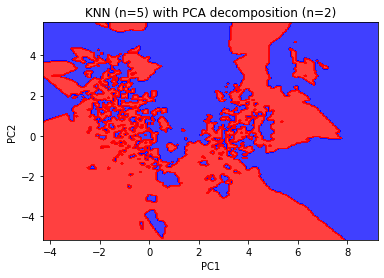

In [211]:
#Plot the test dataset
X_set, y_set = X_test, y_test
X1,X2 = np.meshgrid(np.linspace(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1, num=200),
                   np.linspace(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,num=200))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KNN (n=5) with PCA decomposition (n=2)')
plt.show()

0.7171445064460266
0.64


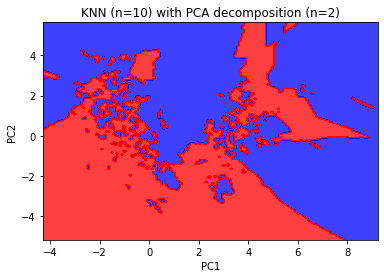

In [215]:
#Fit KNN model but with number of neighbors = 10
classifier = KNeighborsClassifier(n_neighbors = 10, algorithm ='kd_tree')
classifier.fit(X_train, y_train.ravel())

#Look at performance of training data
predictions_train = classifier.predict(X_train)
print(accuracy_score(y_train, predictions_train))

#Look at performance of the test data
predictions_test = classifier.predict(X_test)
print(accuracy_score(y_test, predictions_test))

X_set, y_set = X_test, y_test
X1,X2 = np.meshgrid(np.linspace(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1, num=200),
                   np.linspace(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,num=200))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KNN (n=10) with PCA decomposition (n=2)')
plt.show()